In [27]:
#Project 1 of level 1:
#Idea:EDA on retail sales data
#Data loading and Cleaning
import pandas as pd
df=pd.read_csv(r"C:\Users\syedn\Desktop\EDA_resales _data\retail_sales_dataset.csv")
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [28]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [29]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [30]:
#Descriptive Statistics

In [31]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [32]:
print("Average sales per transaction",df["Total Amount"].mean())

Average sales per transaction 456.0


In [33]:
top_products=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [34]:
#TIME SERIES ANALYSIS

In [35]:
import matplotlib.pyplot as plt


In [36]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

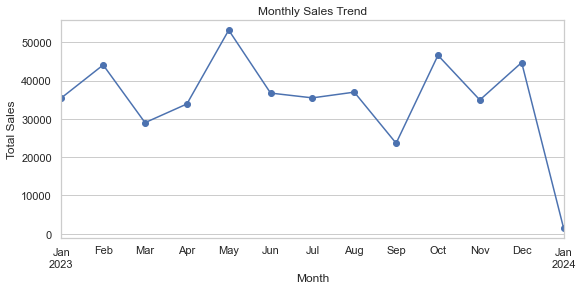

In [37]:
df=df.sort_values('Date')
daily_sales = df.groupby('Date')['Total Amount'].sum()
monthly_sales = daily_sales.resample('M').sum()
plt.figure(figsize=(9,4))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

In [38]:
#Customer and Product Analysis

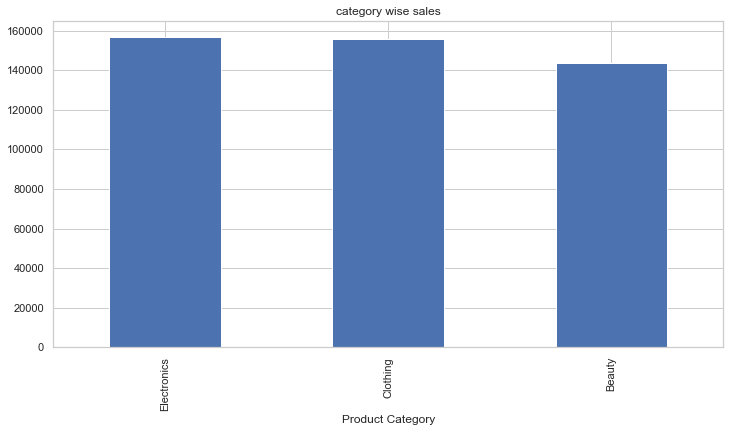

In [39]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(12,6), title='category wise sales')
plt.show()

<AxesSubplot:title={'center':'Sales\xa0by\xa0Gender'}, xlabel='Gender'>

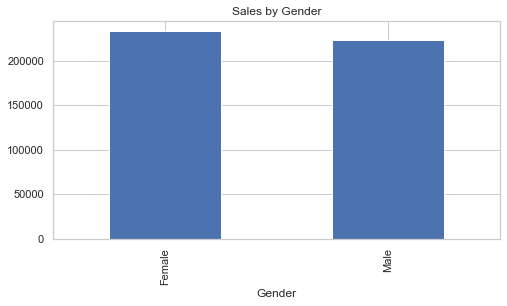

In [40]:
sales_by_gender=df.groupby('Gender')['Total Amount'].sum()
sales_by_gender.plot(kind='bar',figsize=(8,4),title='Sales by Gender')

In [41]:
#Visualization

In [42]:
import seaborn as sns

In [43]:
sns.set(style="whitegrid")

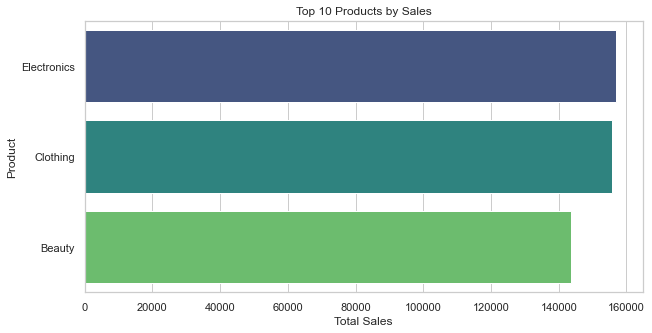

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

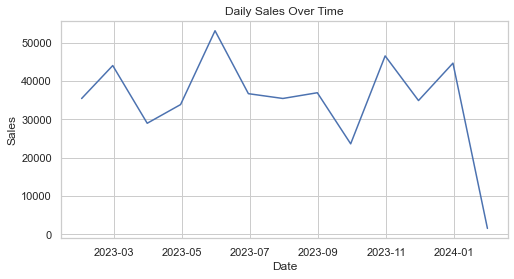

In [45]:
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

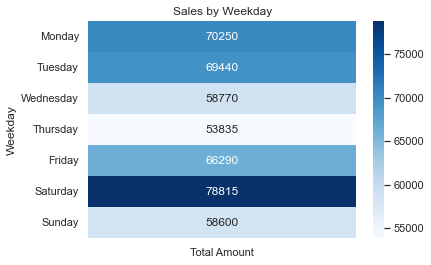

In [46]:
df['Weekday'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour   
pivot = df.pivot_table(index='Weekday', values='Total Amount', aggfunc='sum')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(order)
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f')
plt.title("Sales by Weekday")
plt.ylabel("Weekday")
plt.show()

In [21]:
#Sales peak during weekends	Increase inventory or ads on weekends
#Product “X” sells most	Offer combo packs or loyalty rewards
#Sales drop in February	Run promotions or discounts
#Certain region low sales	Target region with offers or ads